In [4]:
import re
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [36]:
# Load dataset
training = pd.read_csv('Data/Training.csv')
testing = pd.read_csv('Data/Testing.csv')

# Show basic information about the dataset
print(training.info())
print(training.head())

# Show distribution of target variable 'prognosis'
print(training['prognosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...

In [20]:
training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [22]:
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


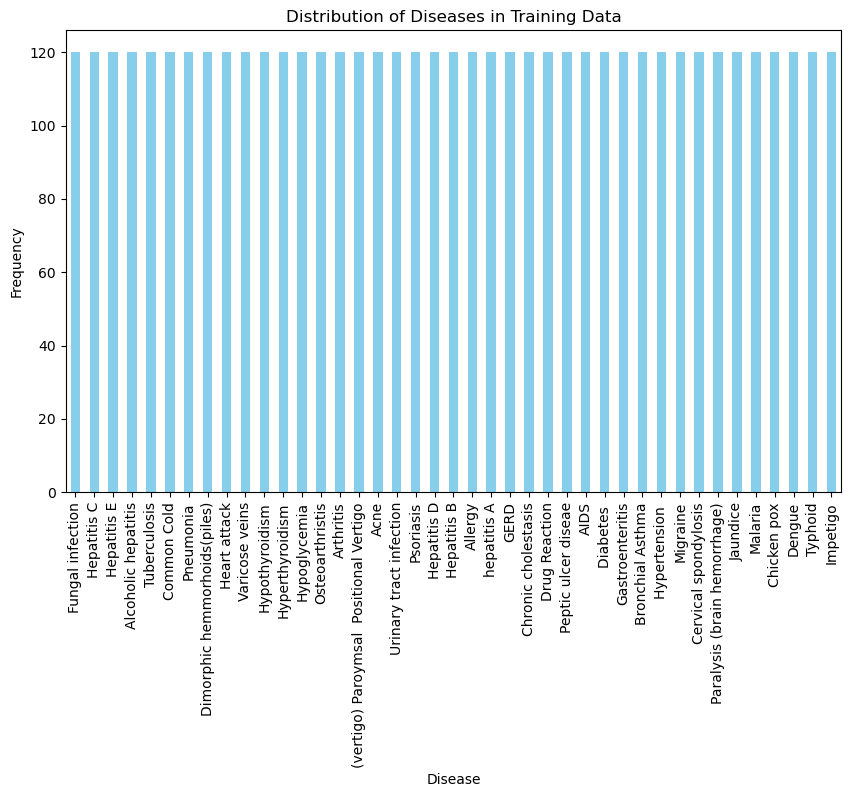

In [32]:
import matplotlib.pyplot as plt

# Visualizing the distribution of the target 'prognosis'
plt.figure(figsize=(10,6))
training['prognosis'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Diseases in Training Data")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.show()


In [53]:
# Check for missing values
print(training.isnull().sum())

# Fill missing values with mean or mode
training.fillna(training.mean(), inplace=True)

# Check again for missing values
print(training.isnull().sum())

# Label Encoding for target 'prognosis'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = training['prognosis']
y = le.fit_transform(y)

# Features (Symptoms)
cols = training.columns[:-1]
x = training[cols]

# Encode symptoms (if categorical) - example: Label Encoding for categorical symptoms
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])

# Scaling the data (especially important for models like SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [55]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

# Verify if classes are balanced now
print(pd.Series(y_resampled).value_counts())


15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: count, dtype: int64


In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.33, random_state=42)


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)

# Print Classification Report and Accuracy
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Train the SVM Model
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(x_test)

# Print Classification Report and Accuracy for SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00

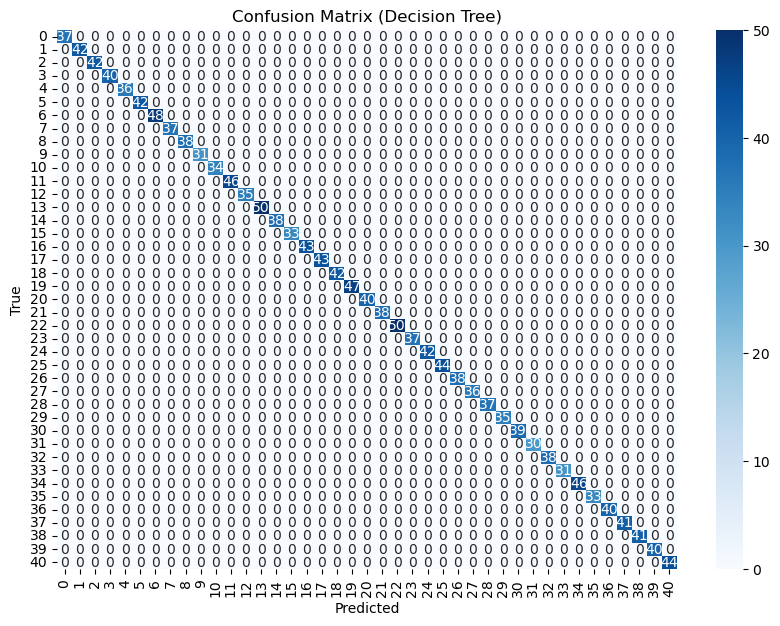

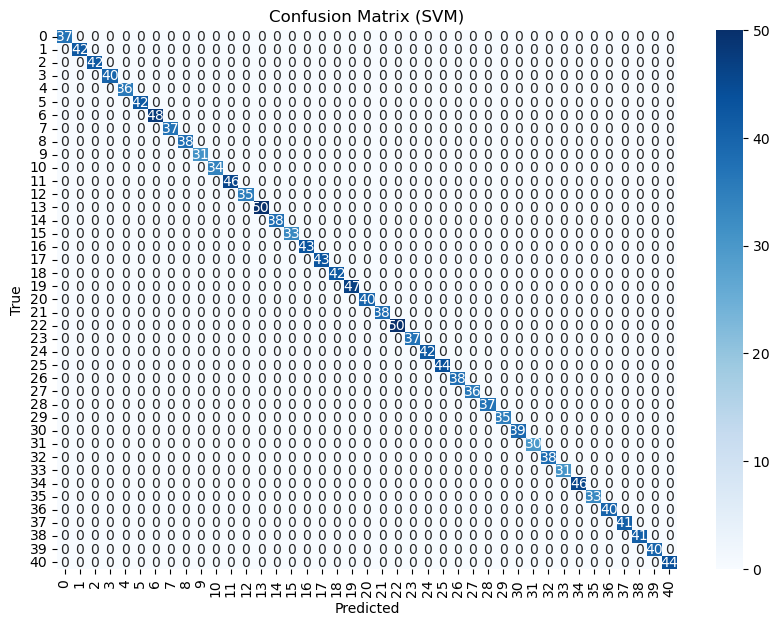

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [103]:
def predict_disease(symptoms_input):
    # Preprocess the input (e.g., encode, scale, etc.)
    symptoms_dict = {col: idx for idx, col in enumerate(cols)}  # Create mapping of symptoms to indices
    input_vector = np.zeros(len(cols))
    for symptom in symptoms_input:
        if symptom in symptoms_dict:
            input_vector[symptoms_dict[symptom]] = 1
    
    # Scale the input if necessary
    input_vector_scaled = scaler.transform([input_vector])
    
    # Predict using the trained Decision Tree model (or any other model)
    prediction = clf.predict(input_vector_scaled)
    predicted_disease = le.inverse_transform(prediction)[0]
    
    print(f"Predicted Disease: {predicted_disease}")


In [105]:
import joblib








# Save the trained model (e.g., Decision Tree)
joblib.dump(clf, 'disease_prediction_model.pkl')
# Save the label encoder
joblib.dump(le, 'label_encoder.pkl')
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [113]:
a='itching, skin_rash, joint_pain, stomach_pain'
predict_disease(a)

Predicted Disease: 3


C:\Users\adars\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
